In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
xslx = pd.ExcelFile("pqdata-tra.xlsx")

unbi= pd.read_excel(xslx, "unb-i") #1minutal
unbv= pd.read_excel(xslx, "unb-v") #1minutal
va= pd.read_excel(xslx, "volts-amps") #1minutal
pq= pd.read_excel(xslx, "pq") #1minutal
kva= pd.read_excel(xslx, "kvas") #1minutal
pf1= pd.read_excel(xslx, "fp1") #1minutal
pf2= pd.read_excel(xslx, "fp2") #1minutal
pf3= pd.read_excel(xslx, "fp3") #1minutal
tdd= pd.read_excel(xslx, "thdi") #10 minutal
thdv= pd.read_excel(xslx, "thdv") #10 minutal
fpst= pd.read_excel(xslx, "pst") #10 minutal
fplt= pd.read_excel(xslx, "plt") #120 minutal - 2 horas
harm= pd.read_excel(xslx, "harm") # 10 minutal


# I. Parametros basicos

## 1. Voltajes de linea

In [4]:
x1= va['Fecha']
vamax= va['A-BVrmsMax[Volts]']
vaavg= va['A-BVrmsAvg[Volts]']
vamin= va['A-BVrmsMin[Volts]']

vbmax= va['C-AVrmsMax[Volts]']
vbavg= va['C-AVrmsAvg[Volts]']
vbmin= va['C-AVrmsMin[Volts]']

vcmax= va['B-CVrmsMax[Volts]']
vcavg= va['B-CVrmsAvg[Volts]']
vcmin= va['B-CVrmsMin[Volts]']

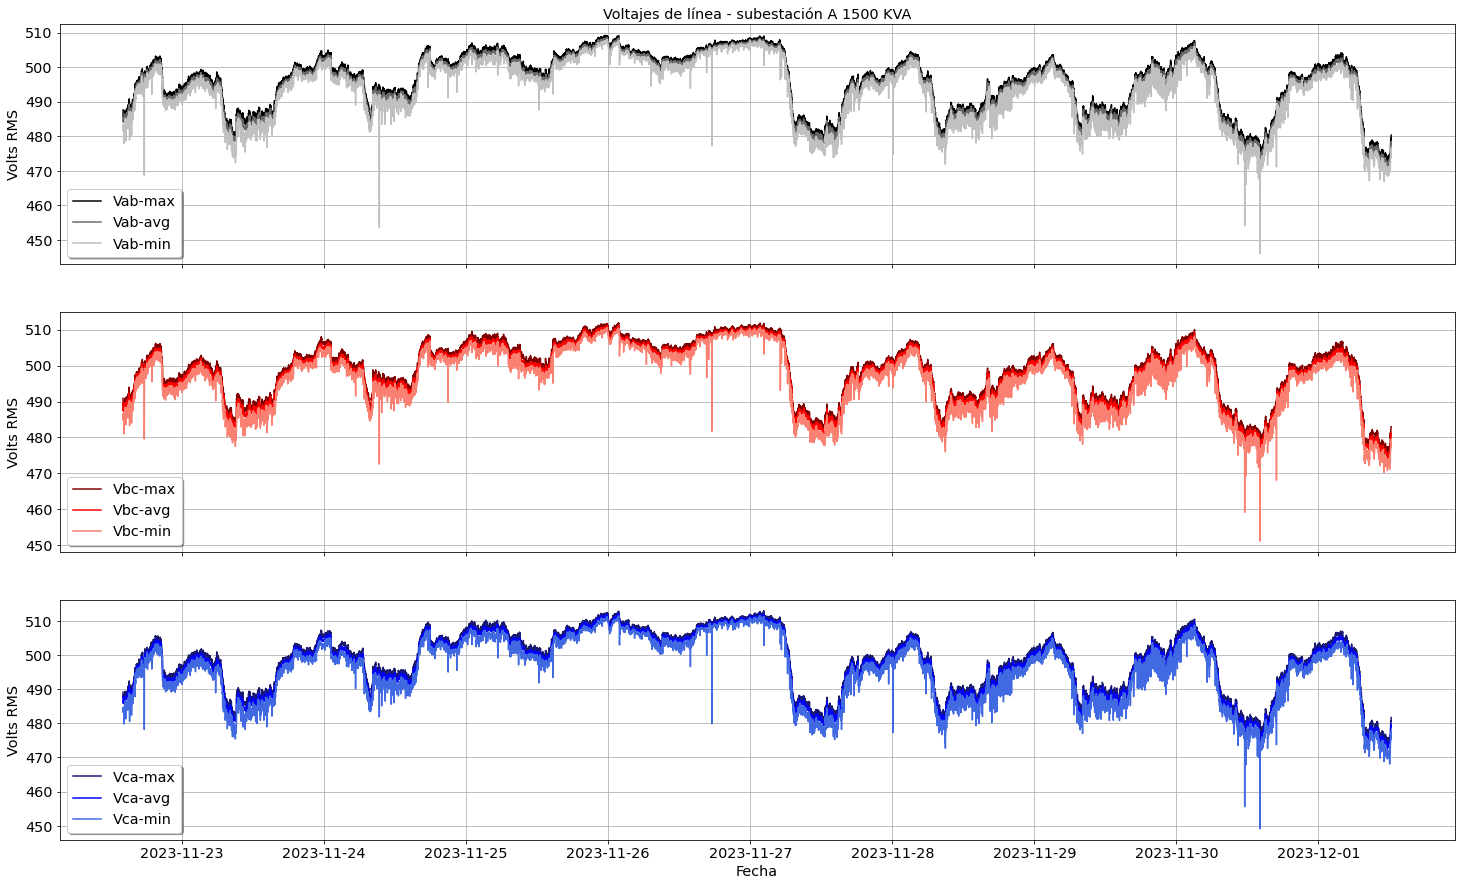

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots( 
    figsize=(25,15),
    nrows=3, ncols=1, sharex=True
)

ax1.plot(x1, vamax, color ='black', label='Vab-max')
ax1.plot(x1, vaavg, color = 'dimgray', label='Vab-avg')
ax1.plot(x1, vamin, color = 'silver', label= 'Vab-min')

ax1.set_title('Voltajes de línea - subestación A 1500 KVA')
#ax1.set_xlabel('Fecha')
ax1.set_ylabel('Volts RMS')


ax2.plot(x1, vbmax, color ='maroon', label='Vbc-max')
ax2.plot(x1, vbavg, color = 'red', label='Vbc-avg')
ax2.plot(x1, vbmin, color = 'salmon', label= 'Vbc-min')

#ax2.set_title('Perfil de voltaje de fase - B (Baja tension)')
#ax2.set_xlabel('Fecha')
ax2.set_ylabel('Volts RMS')

ax3.plot(x1, vcmax, color ='midnightblue', label='Vca-max')
ax3.plot(x1, vcavg, color = 'blue', label='Vca-avg')
ax3.plot(x1, vcmin, color = 'royalblue', label= 'Vca-min')

#ax3.set_title('Perfil de voltaje de fase - C (Baja tension)')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Volts RMS')

ax1.grid()
ax2.grid()
ax3.grid()

ax1.legend(shadow=True )
ax2.legend(shadow=True )
ax3.legend(shadow=True )

plt.show()


## Estadisticas

In [6]:
vi_rms=va.describe()
pd.set_option('display.max_columns', None)
vi_rms

,A-BVrmsMax[Volts],A-BVrmsAvg[Volts],A-BVrmsMin[Volts],B-CVrmsMax[Volts],B-CVrmsAvg[Volts],B-CVrmsMin[Volts],C-AVrmsMax[Volts],C-AVrmsAvg[Volts],C-AVrmsMin[Volts],AIrmsMax[Amps],AIrmsAvg[Amps],AIrmsMin[Amps],BIrmsMax[Amps],BIrmsAvg[Amps],BIrmsMin[Amps],CIrmsMax[Amps],CIrmsAvg[Amps],CIrmsMin[Amps]
count,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000
mean,496.148713,495.151629,493.527806,498.571782,497.510407,495.806627,498.954227,497.920106,496.307000,397.392351,324.891050,276.329830,389.460526,319.897927,272.192131,384.523185,317.076709,272.100581
std,8.305231,8.468372,9.001622,8.780825,8.962288,9.486256,8.100440,8.234581,8.719049,267.978571,231.616047,212.314835,250.603829,215.786782,196.774058,255.470535,223.422377,207.392249
min,472.300000,471.400000,446.100000,473.700000,472.700000,449.100000,475.200000,474.200000,451.200000,44.430000,42.430000,39.920000,51.300000,49.410000,46.040000,43.450000,41.790000,37.090000
25%,490.000000,488.900000,486.700000,492.100000,490.900000,488.500000,492.800000,491.700000,489.700000,180.260000,141.340000,102.560000,185.490000,149.950000,110.020000,181.720000,142.600000,101.520000
50%,498.000000,497.100000,495.600000,500.200000,499.200000,497.700000,500.600000,499.600000,498.200000,288.710000,234.270000,185.630000,289.160000,234.040000,185.530000,286.460000,229.900000,184.030000
75%,502.700000,501.800000,500.500000,505.500000,504.600000,503.200000,505.300000,504.300000,503.000000,676.700000,575.800000,507.700000,648.500000,553.000000,486.000000,654.000000,563.000000,502.200000
max,509.200000,508.600000,508.000000,512.900000,512.100000,511.500000,511.800000,511.100000,510.500000,1182.800000,877.700000,818.900000,1136.900000,837.000000,771.000000,1081.200000,845.800000,792.400000


## 2. Corrientes de fase

In [7]:
x1= va['Fecha']
iamax= va['AIrmsMax[Amps]']
iaavg= va['AIrmsAvg[Amps]']
iamin= va['AIrmsMin[Amps]']

ibmax= va['CIrmsMax[Amps]']
ibavg= va['CIrmsAvg[Amps]']
ibmin = va['CIrmsMin[Amps]']


icmax= va['BIrmsMax[Amps]']
icavg= va['BIrmsAvg[Amps]']
icmin= va['BIrmsMin[Amps]']

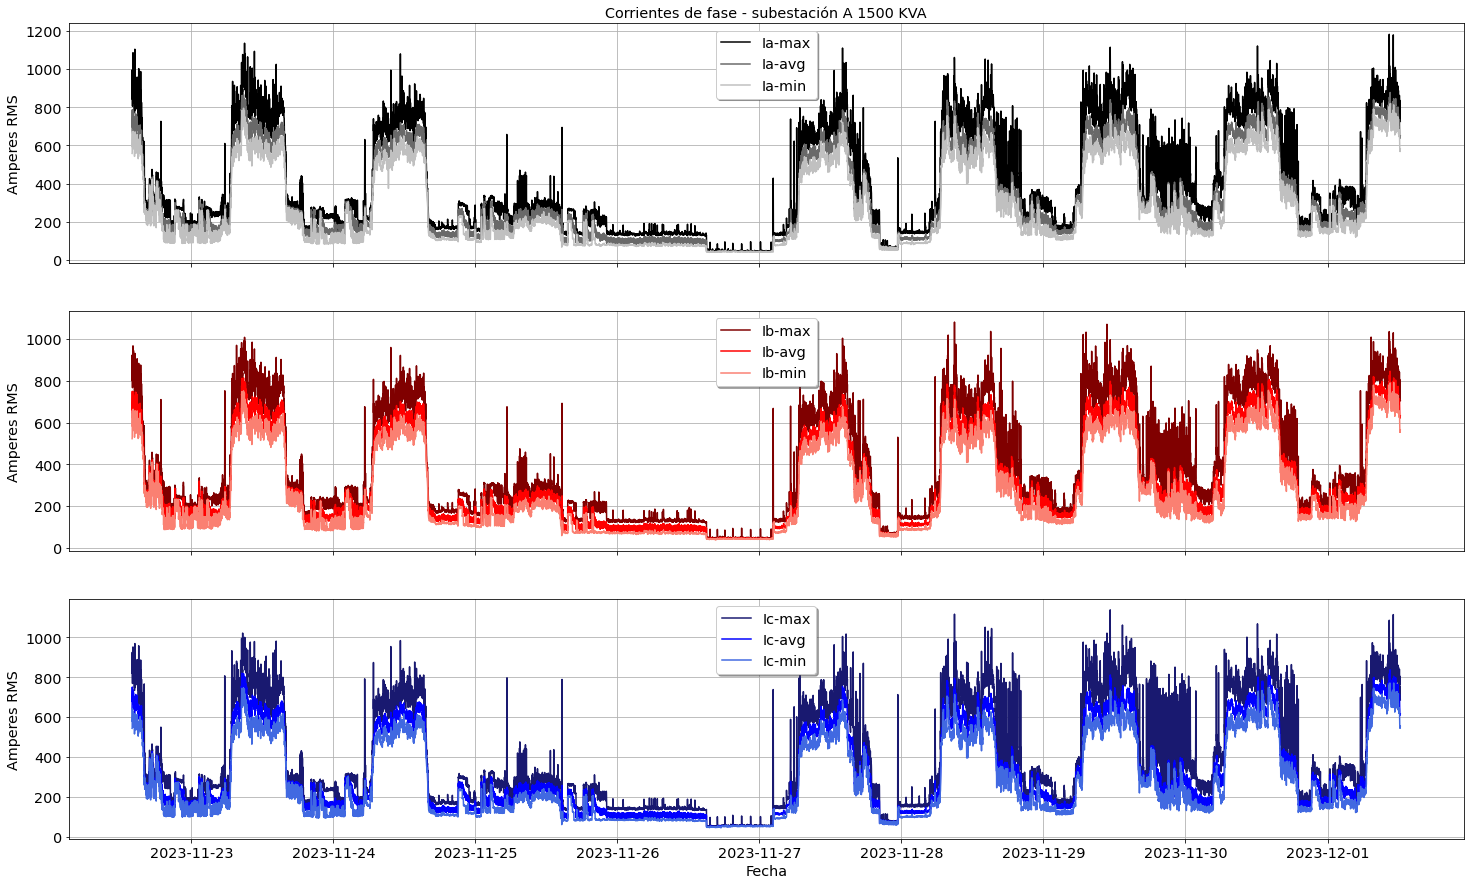

In [73]:
fig, (ix1, ix2, ix3) = plt.subplots( 
    figsize=(25,15),
    nrows=3, ncols=1, sharex=True
)

ix1.plot(x1, iamax, color ='black', label='Ia-max')
ix1.plot(x1, iaavg, color = 'dimgray', label='Ia-avg')
ix1.plot(x1, iamin, color = 'silver', label= 'Ia-min')

ix1.set_title('Corrientes de fase - subestación A 1500 KVA')
#ax1.set_xlabel('Fecha')
ix1.set_ylabel('Amperes RMS')


ix2.plot(x1, ibmax, color ='maroon', label='Ib-max')
ix2.plot(x1, ibavg, color = 'red', label='Ib-avg')
ix2.plot(x1, ibmin, color = 'salmon', label= 'Ib-min')

#ix2.set_title('Perfil de distorsion armonica total de demanda - B (Baja tension)')
#ax2.set_xlabel('Fecha')
ix2.set_ylabel('Amperes RMS')

ix3.plot(x1, icmax, color ='midnightblue', label='Ic-max')
ix3.plot(x1, icavg, color = 'blue', label='Ic-avg')
ix3.plot(x1, icmin, color = 'royalblue', label= 'Ic-min')

#ax3.set_title('Perfil de voltaje de fase - C (Baja tension)')
ix3.set_xlabel('Fecha')
ix3.set_ylabel('Amperes RMS')

ix1.grid()
ix2.grid()
ix3.grid()

ix1.legend(shadow=True)
ix2.legend(shadow=True)
ix3.legend(shadow=True)

#ix1.legend(loc='lower right', shadow=True )
#ix2.legend(loc='lower right', shadow=True )
#ix3.legend(loc='lower right', shadow=True )

plt.show()

## Estadisticas

In [10]:
vi_rms

,A-BVrmsMax[Volts],A-BVrmsAvg[Volts],A-BVrmsMin[Volts],B-CVrmsMax[Volts],B-CVrmsAvg[Volts],B-CVrmsMin[Volts],C-AVrmsMax[Volts],C-AVrmsAvg[Volts],C-AVrmsMin[Volts],AIrmsMax[Amps],AIrmsAvg[Amps],AIrmsMin[Amps],BIrmsMax[Amps],BIrmsAvg[Amps],BIrmsMin[Amps],CIrmsMax[Amps],CIrmsAvg[Amps],CIrmsMin[Amps]
count,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000
mean,496.148713,495.151629,493.527806,498.571782,497.510407,495.806627,498.954227,497.920106,496.307000,397.392351,324.891050,276.329830,389.460526,319.897927,272.192131,384.523185,317.076709,272.100581
std,8.305231,8.468372,9.001622,8.780825,8.962288,9.486256,8.100440,8.234581,8.719049,267.978571,231.616047,212.314835,250.603829,215.786782,196.774058,255.470535,223.422377,207.392249
min,472.300000,471.400000,446.100000,473.700000,472.700000,449.100000,475.200000,474.200000,451.200000,44.430000,42.430000,39.920000,51.300000,49.410000,46.040000,43.450000,41.790000,37.090000
25%,490.000000,488.900000,486.700000,492.100000,490.900000,488.500000,492.800000,491.700000,489.700000,180.260000,141.340000,102.560000,185.490000,149.950000,110.020000,181.720000,142.600000,101.520000
50%,498.000000,497.100000,495.600000,500.200000,499.200000,497.700000,500.600000,499.600000,498.200000,288.710000,234.270000,185.630000,289.160000,234.040000,185.530000,286.460000,229.900000,184.030000
75%,502.700000,501.800000,500.500000,505.500000,504.600000,503.200000,505.300000,504.300000,503.000000,676.700000,575.800000,507.700000,648.500000,553.000000,486.000000,654.000000,563.000000,502.200000
max,509.200000,508.600000,508.000000,512.900000,512.100000,511.500000,511.800000,511.100000,510.500000,1182.800000,877.700000,818.900000,1136.900000,837.000000,771.000000,1081.200000,845.800000,792.400000


## 3. Potencias y factor de potencia

In [11]:
x1= pq['Fecha']
ptmax= pq['TOTP(kW)Max[kW]']
ptavg= pq['TOTP(kW)Avg[kW]']
ptmin= pq['TOTP(kW)Min[kW]']

qtmax= pq['TOTQFnd(kVAR)Max[kVAR]']
qtavg= pq['TOTQFnd(kVAR)Avg[kVAR]']
qtmin= pq['TOTQFnd(kVAR)Min[kVAR]']

pfmax= pf1['TOTPF(vec)Max[pu]']
pfavg= pf2['TOTPF(vec)Avg[pu]']
pfmin= pf3['TOTPF(vec)Min[pu]']

x1= kva['Fecha']
kvamax= kva['kvamax']
kvaavg= kva['kvaavg']
kvamin= kva['kvamin']


## Estadisticas

In [12]:
pq1=pq.describe()
pq1

,TOTP(kW)Max[kW],TOTP(kW)Avg[kW],TOTP(kW)Min[kW],TOTQFnd(kVAR)Max[kVAR],TOTQFnd(kVAR)Avg[kVAR],TOTQFnd(kVAR)Min[kVAR]
count,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000
mean,298.070980,260.912581,228.113889,73.106891,60.528120,52.348090
std,191.539137,181.514482,173.052116,60.915628,53.388605,51.094963
min,25.361000,25.328000,25.256000,-7.361200,-36.599000,-56.759400
25%,147.250000,117.730000,84.290000,37.090000,29.595000,24.059000
50%,230.060000,194.280000,157.940000,56.190000,46.840000,39.510000
75%,502.100000,464.900000,426.900000,102.620000,86.120000,74.860000
max,763.500000,674.300000,638.900000,461.900000,358.000000,349.200000


In [13]:
kvap=kva.describe()
kvap

,TOTS-vec(kVA)Max[kVA],TOTS-vec(kVA)Avg[kVA],TOTS-vec(kVA)Min[kVA],kvamax,kvaavg,kvamin
count,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000
mean,307.771531,269.332331,236.034855,20.518102,17.955489,15.735657
std,198.045562,187.156729,178.357095,13.203037,12.477115,11.890473
min,25.375000,25.331000,25.270000,1.691667,1.688733,1.684667
25%,150.810000,122.420000,91.560000,10.054000,8.161333,6.104000
50%,234.870000,199.310000,162.160000,15.658000,13.287333,10.810667
75%,512.400000,474.000000,434.800000,34.160000,31.600000,28.986667
max,793.000000,698.800000,663.900000,52.866667,46.586667,44.260000


In [14]:
pfmax.describe()

count    12857.000000
mean         0.937385
std          0.264886
min         -0.999900
25%          0.959100
50%          0.979600
75%          0.989000
max          1.000000
Name: TOTPF(vec)Max[pu], dtype: float64

In [15]:
pfavg.describe()

count    12857.000000
mean         0.870166
std          0.422357
min         -0.999900
25%          0.943600
50%          0.973700
75%          0.984700
max          1.000000
Name: TOTPF(vec)Avg[pu], dtype: float64

In [16]:
pfmin.describe()

count    12857.000000
mean         0.876272
std          0.386342
min         -0.999900
25%          0.927000
50%          0.968000
75%          0.981300
max          1.000000
Name: TOTPF(vec)Min[pu], dtype: float64

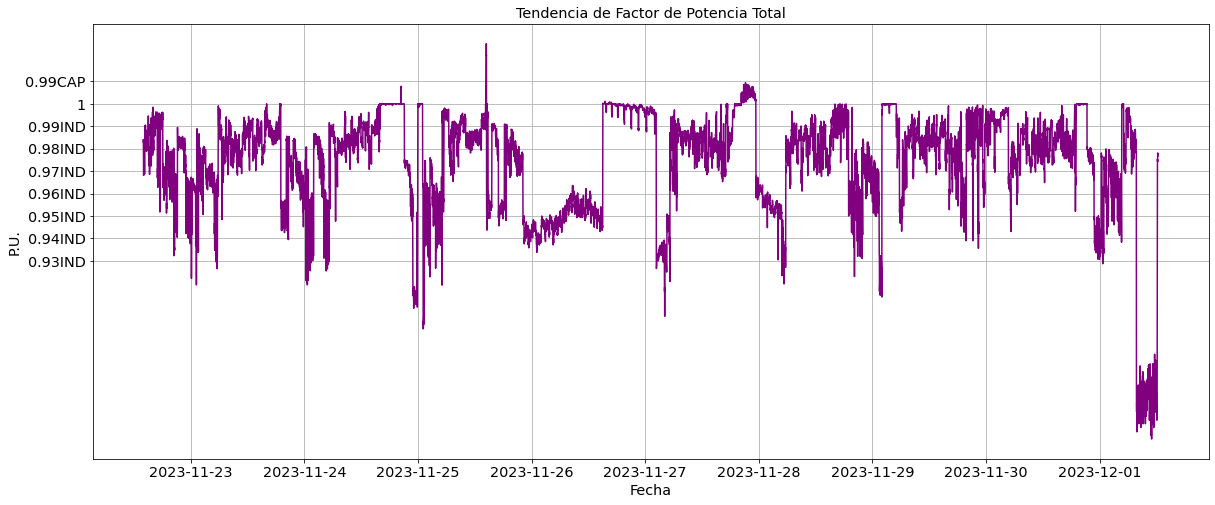

In [22]:
## MAXIMOS

x1= pf1['Fecha']

# Obtiene la información de la segunda columna del Excel
second_col = pf1.iloc[:, 1].copy()  # Usa el método copy() para obtener una copia del DataFrame

# Itera a través de los valores de la columna
for i in range(len(second_col)):
    # Revisa si el valor es positivo
    if second_col[i] > 0:
        # Si el valor es positivo, se le resta a 2
        second_col[i] = 2 - second_col[i]
    # Revisa si el valor es negativo
    elif second_col[i] < 0:
        # Multiplica el valor por -1 para hacerlo positivo
        second_col[i] *= -1

# Actualiza la segunda columna de datos en el DataFrame original
pf1.iloc[:, 1] = second_col


plt.figure(figsize=(20,8))
plt.plot(x1, pf1.iloc[:, 1], color='purple', label='FP')

plt.title('Tendencia de Factor de Potencia Total')
plt.xlabel('Fecha')
plt.ylabel('P.U.')

# Configurar el eje "y" en casos donde el FP no baje de 0.9 en IND y CAP
plt.yticks([ 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1, 1.01],
          [ '0.93IND', '0.94IND', '0.95IND', '0.96IND', '0.97IND', '0.98IND', '0.99IND', '1', '0.99CAP'])


    
plt.grid()
plt.show()

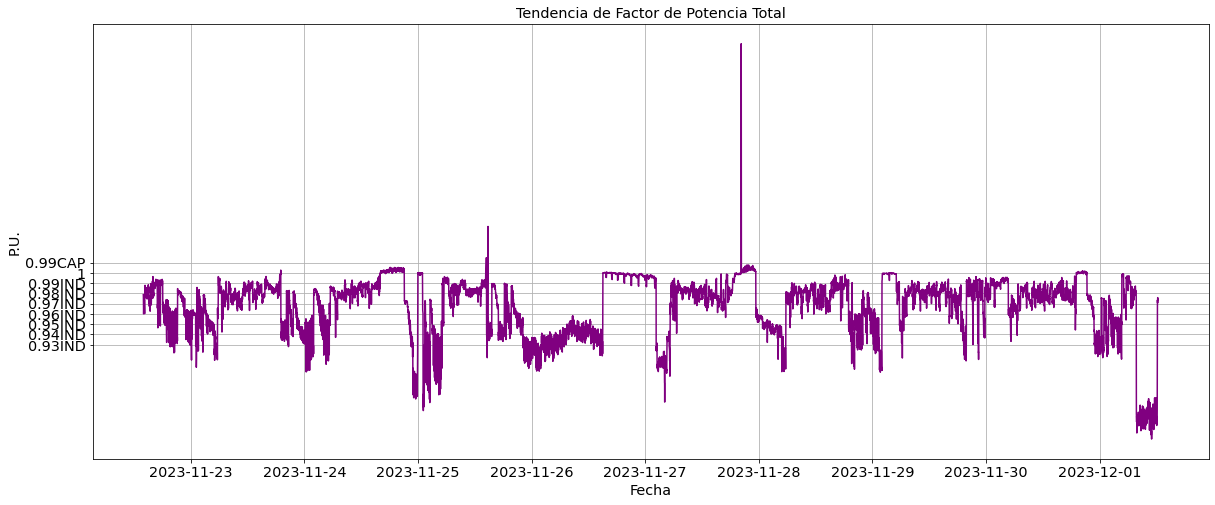

In [23]:
# PROMEDIOS

# Obtiene la información de la segunda columna del Excel
third_col = pf2.iloc[:, 1].copy()  # Usa el método copy() para obtener una copia del DataFrame

# Itera a través de los valores de la columna
for i in range(len(third_col)):
    # Revisa si el valor es positivo
    if third_col[i] > 0:
        # Si el valor es positivo, se le resta a 2
        third_col[i] = 2 - third_col[i]
    # Revisa si el valor es negativo
    elif third_col[i] < 0:
        # Multiplica el valor por -1 para hacerlo positivo
        third_col[i] *= -1

# Actualiza la segunda columna de datos en el DataFrame original
pf2.iloc[:, 1] = third_col


plt.figure(figsize=(20,8))
plt.plot(x1, pf2.iloc[:, 1], color='purple', label='FP')

plt.title('Tendencia de Factor de Potencia Total')
plt.xlabel('Fecha')
plt.ylabel('P.U.')

# Configurar el eje "y" en casos donde el FP no baje de 0.9 en IND y CAP
plt.yticks([ 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1, 1.01],
          [ '0.93IND', '0.94IND', '0.95IND', '0.96IND', '0.97IND', '0.98IND', '0.99IND', '1', '0.99CAP'])


    
plt.grid()
plt.show()

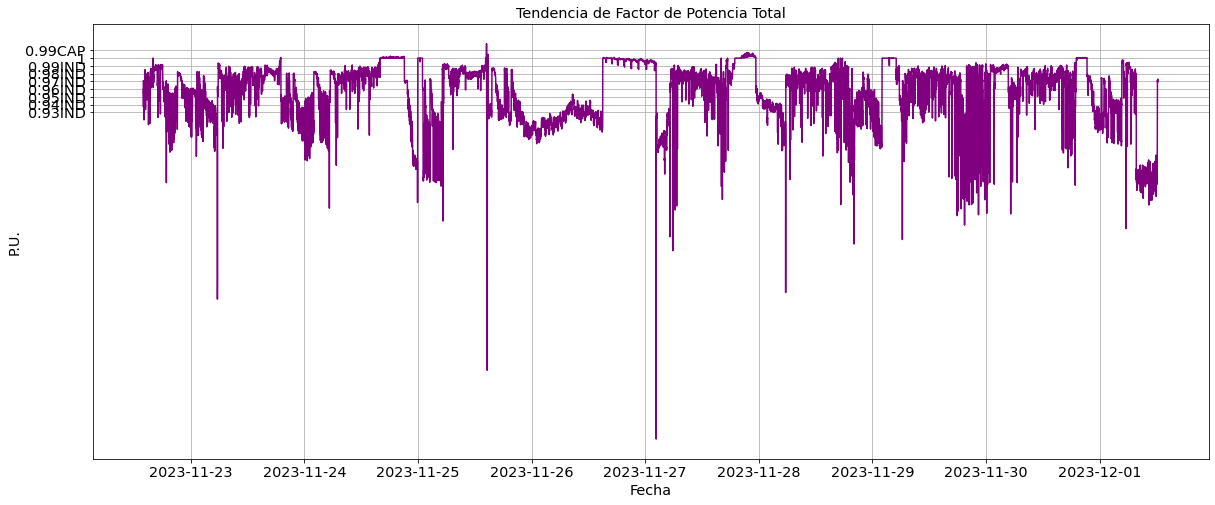

In [24]:
#MINIMOS

# Obtiene la información de la segunda columna del Excel
fourth_col = pf3.iloc[:, 1].copy()  # Usa el método copy() para obtener una copia del DataFrame

# Itera a través de los valores de la columna
for i in range(len(fourth_col)):
    # Revisa si el valor es positivo
    if fourth_col[i] > 0:
        # Si el valor es positivo, se le resta a 2
        fourth_col[i] = 2 - fourth_col[i]
    # Revisa si el valor es negativo
    elif fourth_col[i] < 0:
        # Multiplica el valor por -1 para hacerlo positivo
        fourth_col[i] *= -1

# Actualiza la segunda columna de datos en el DataFrame original
pf3.iloc[:, 1] = fourth_col


plt.figure(figsize=(20,8))
plt.plot(x1, pf3.iloc[:, 1], color='purple', label='FP')

plt.title('Tendencia de Factor de Potencia Total')
plt.xlabel('Fecha')
plt.ylabel('P.U.')

# Configurar el eje "y" en casos donde el FP no baje de 0.9 en IND y CAP
plt.yticks([ 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1, 1.01],
          [ '0.93IND', '0.94IND', '0.95IND', '0.96IND', '0.97IND', '0.98IND', '0.99IND', '1', '0.99CAP'])


    
plt.grid()
plt.show()

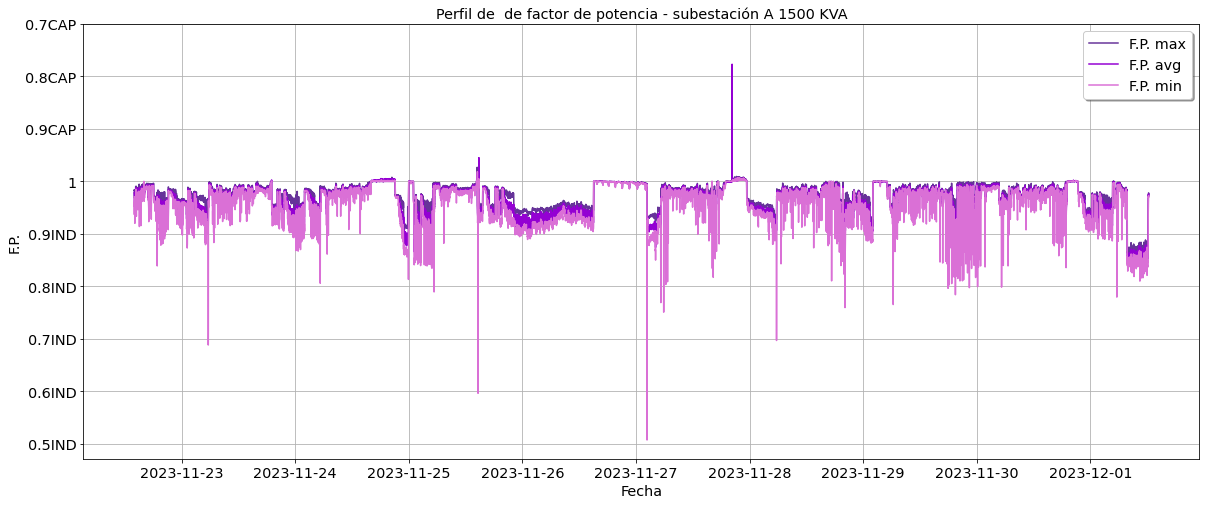

In [25]:
plt.figure(figsize=(20,8))


plt.plot(x1, pf1.iloc[:, 1], color='rebeccapurple', label='F.P. max')
plt.plot(x1, pf2.iloc[:, 1], color='darkviolet', label='F.P. avg')
plt.plot(x1, pf3.iloc[:, 1], color='orchid', label='F.P. min')

plt.title('Perfil de  de factor de potencia - subestación A 1500 KVA')
plt.xlabel('Fecha')
plt.ylabel('F.P.')


plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3 ],
         [ '0.5IND', '0.6IND', '0.7IND', '0.8IND', '0.9IND', '1', '0.9CAP', '0.8CAP', '0.7CAP' ])

plt.grid()
plt.legend( shadow=True )
plt.show()


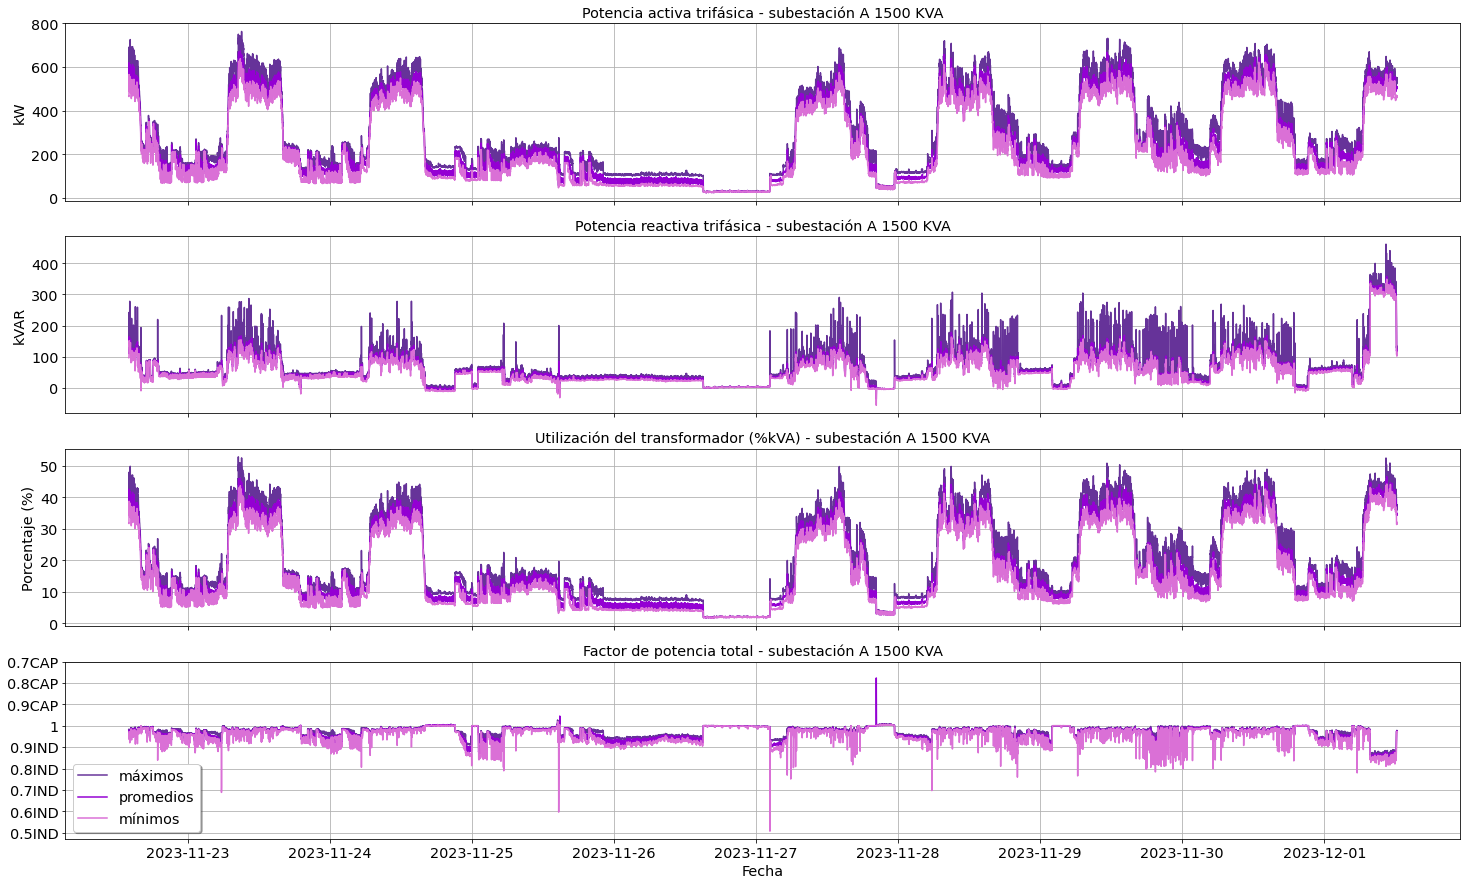

In [26]:
fig, (qx1, qx2, qx3, qx4) = plt.subplots( 
    figsize=(25,15),
    nrows=4, ncols=1, sharex=True
)

qx1.plot(x1, ptmax, color ='rebeccapurple', label='kW-max')
qx1.plot(x1, ptavg, color = 'darkviolet', label='kW-avg')
qx1.plot(x1, ptmin, color = 'orchid', label= 'kW-min')

qx1.set_title('Potencia activa trifásica - subestación A 1500 KVA')
qx4.set_xlabel('Fecha')
qx1.set_ylabel('kW')


qx2.plot(x1, qtmax, color ='rebeccapurple', label='kVAR-max')
qx2.plot(x1, qtavg, color = 'darkviolet', label='kVAR-avg')
qx2.plot(x1, qtmin, color = 'orchid', label= 'kVAR-min')

qx2.set_title('Potencia reactiva trifásica - subestación A 1500 KVA')
#ax2.set_xlabel('Fecha')
qx2.set_ylabel('kVAR')

qx3.plot(x1, kvamax, color ='rebeccapurple', label='%kVA-max')
qx3.plot(x1, kvaavg, color = 'darkviolet', label='%kVA-avg')
qx3.plot(x1, kvamin, color = 'orchid', label= '%kVA-min')

qx3.set_title('Utilización del transformador (%kVA) - subestación A 1500 KVA')
#ax2.set_xlabel('Fecha')
qx3.set_ylabel('Porcentaje (%)')


qx4.set_title('Factor de potencia total - subestación A 1500 KVA')
qx4.plot(x1, pf1.iloc[:, 1], color='rebeccapurple', label='máximos')
qx4.plot(x1, pf2.iloc[:, 1], color='darkviolet', label='promedios')
qx4.plot(x1, pf3.iloc[:, 1], color='orchid', label='mínimos')


qx4.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3 ],
         [ '0.5IND', '0.6IND', '0.7IND', '0.8IND', '0.9IND', '1', '0.9CAP', '0.8CAP', '0.7CAP' ])


qx1.grid()
qx2.grid()
qx3.grid()
qx4.grid()

qx4.legend(shadow=True)



#ix1.legend(loc='lower right', shadow=True )
#ix2.legend(loc='lower right', shadow=True )


plt.show()

# II. Parametros de calidad de potencia

# 1. Flicker PST y PLT

In [27]:
x1= va['Fecha']

x2= fpst['Fecha']
x22= fplt['Fecha']


psta= fpst['AVPstValue[]']
pstb= fpst['CVPstValue[]']
pstc= fpst['BVPstValue[]']

plta= fplt['AVPltValue[]']
pltb= fplt['CVPltValue[]']
pltc= fplt['BVPltValue[]']


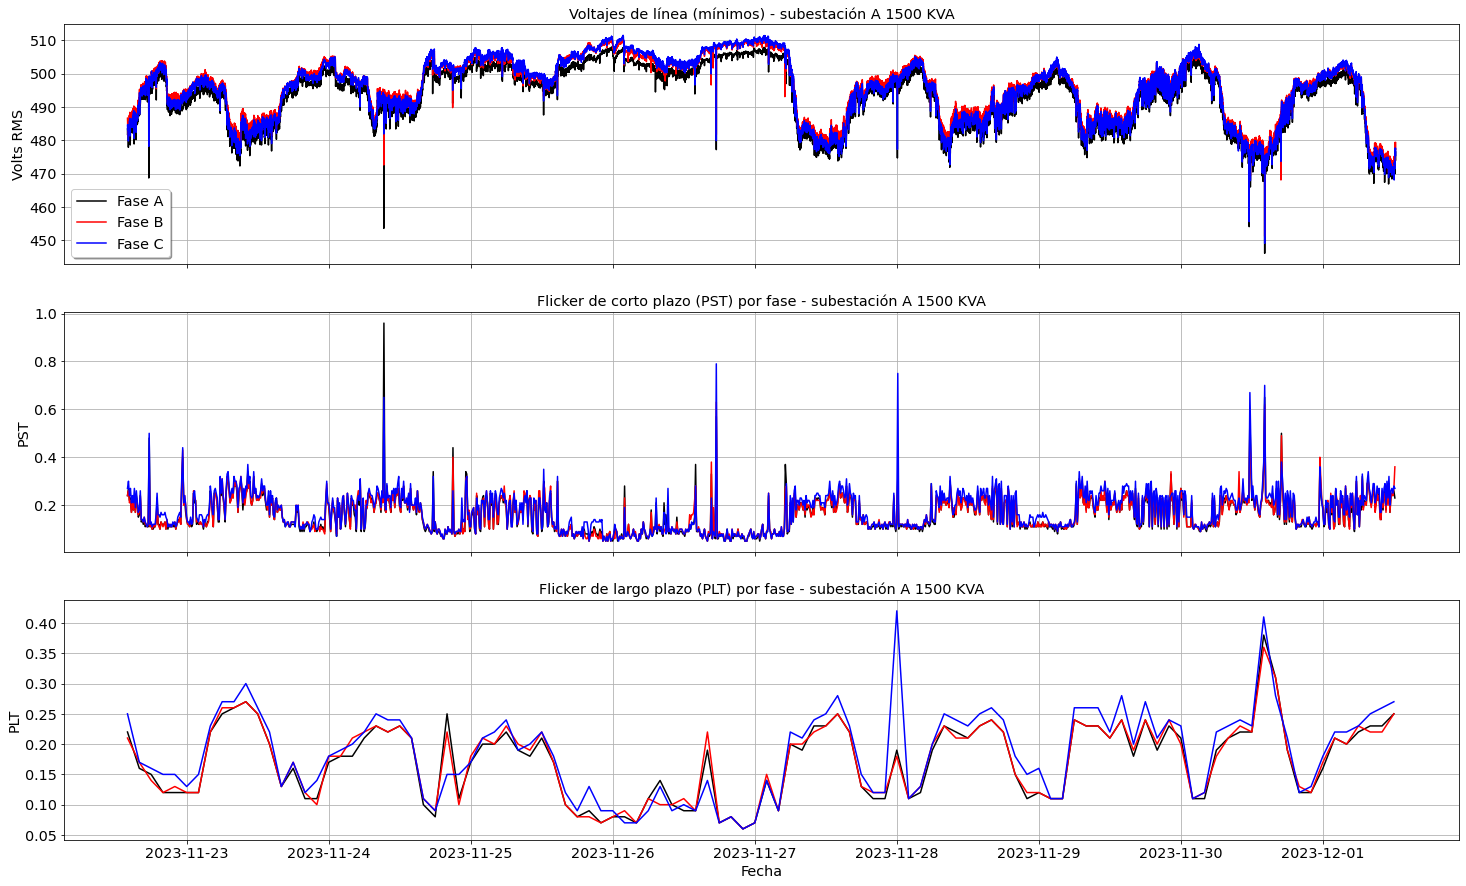

In [74]:
fig, (bx1, bx2, bx3) = plt.subplots( 
    figsize=(25,15),
    nrows=3, ncols=1, sharex=True
)

bx1.set_title('Voltajes de línea (mínimos) - subestación A 1500 KVA')
bx1.set_ylabel('Volts RMS')
bx3.set_xlabel('Fecha')

bx1.plot(x1, vamin, color = 'black', label='Fase A')
bx1.plot(x1, vbmin, color = 'red', label='Fase B')
bx1.plot(x1, vcmin, color = 'blue', label='Fase C')


bx2.set_title('Flicker de corto plazo (PST) por fase - subestación A 1500 KVA')
bx2.set_ylabel('PST')

bx2.plot(x2, psta, color = 'black', label='PST-a')
bx2.plot(x2, pstb, color = 'red', label='PST-b')
bx2.plot(x2, pstc, color = 'blue', label='PST-c')


bx3.set_title('Flicker de largo plazo (PLT) por fase - subestación A 1500 KVA')
bx3.set_ylabel('PLT')

bx3.plot(x22, plta, color = 'black', label='PLT-a')
bx3.plot(x22, pltb, color = 'red', label='PLT-b')
bx3.plot(x22, pltc, color = 'blue', label='PLT-c')


bx1.grid()
bx2.grid()
bx3.grid()

bx1.legend(shadow=True)
#bx2.legend(shadow=True)
#bx3.legend(shadow=True)

plt.show()


## Estadisticas

In [34]:
fpst1=fpst.describe()
fpst1

,AVPstValue[],BVPstValue[],CVPstValue[]
count,1285.000000,1285.000000,1285.000000
mean,0.160738,0.174749,0.162708
std,0.075521,0.080464,0.071491
min,0.050020,0.050020,0.050010
25%,0.100040,0.110020,0.109990
50%,0.139960,0.159990,0.139990
75%,0.219990,0.240020,0.220000
max,0.960000,0.790000,0.630000


In [35]:
fplt1=fplt.describe()
fplt1

,AVPltValue[],BVPltValue[],CVPltValue[]
count,108.000000,108.000000,108.000000
mean,0.172126,0.186665,0.173796
std,0.062704,0.070684,0.061806
min,0.060020,0.059990,0.060000
25%,0.109970,0.129990,0.120000
50%,0.190020,0.200000,0.190000
75%,0.220000,0.239990,0.220000
max,0.380000,0.420000,0.360000


# 2. Desbalance de tensión y corriente

In [36]:
unbv.head()

,Fecha,A-BVrmsMax[Volts],B-CVrmsMax[Volts],C-AVrmsMax[Volts],beta-max,unb-vmax,A-BVrmsAvg[Volts],B-CVrmsAvg[Volts],C-AVrmsAvg[Volts],beta-avg,unb-vavg
0,2023-11-22 14:00:00,487.6,489.1,490.9,0.333343,0.390062,486.5,487.9,489.8,0.333344,0.391961
1,2023-11-22 14:01:00,487.5,488.9,490.7,0.333343,0.378853,485.7,487.2,489.0,0.333344,0.391584
2,2023-11-22 14:02:00,485.7,487.3,488.8,0.333342,0.367359,484.6,486.1,487.8,0.333343,0.380307
3,2023-11-22 14:03:00,486.1,487.8,489.0,0.333341,0.344967,484.3,485.9,487.5,0.333343,0.380229
4,2023-11-22 14:04:00,486.5,488.1,489.5,0.333342,0.355133,485.0,486.5,488.3,0.333344,0.392147


In [37]:
unbi.head()

,Fecha,AIrmsAvg[Amps],BIrmsAvg[Amps],CIrmsAvg[Amps],beta,%unb-i
0,2023-11-22 14:00:00,667.3,645.0,624.2,0.334324,3.861041
1,2023-11-22 14:01:00,735.6,700.4,694.5,0.334217,3.645853
2,2023-11-22 14:02:00,787.2,750.7,749.9,0.334038,3.254108
3,2023-11-22 14:03:00,758.0,721.7,724.4,0.334017,3.204878
4,2023-11-22 14:04:00,694.3,675.9,659.0,0.333939,3.017115


In [38]:
x1= va['Fecha']

#################################

vaavg= va['A-BVrmsAvg[Volts]']
vbavg= va['C-AVrmsAvg[Volts]']
vcavg= va['B-CVrmsAvg[Volts]']

#################################

iaavg= va['AIrmsAvg[Amps]']
ibavg= va['CIrmsAvg[Amps]']
icavg= va['BIrmsAvg[Amps]']

#################################

unbvavg= unbv['unb-vavg']
unbiavg= unbi['%unb-i']




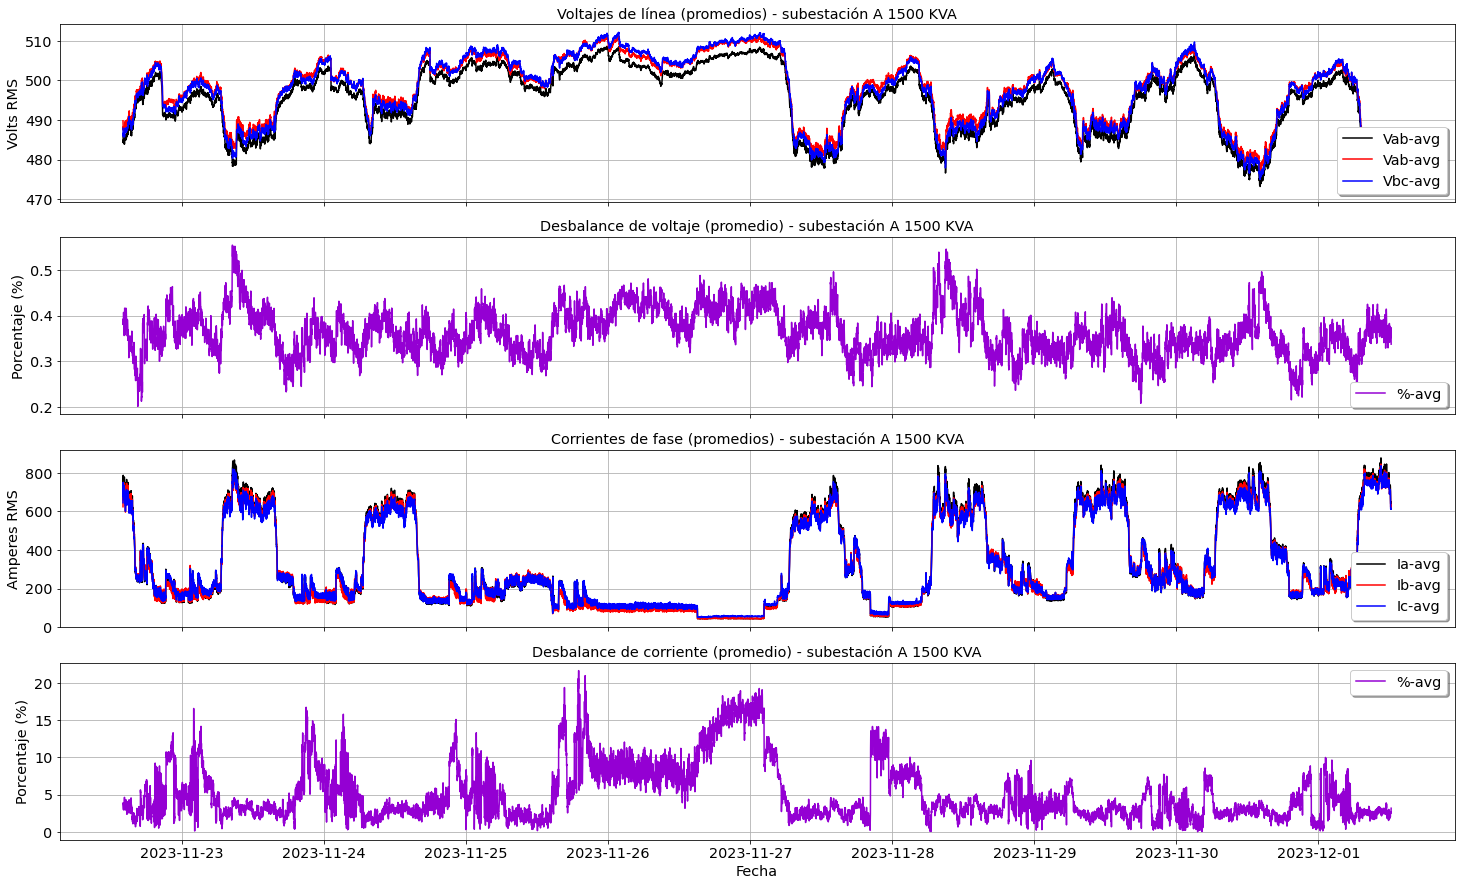

In [76]:
fig, (dx1, dx2, dx3, dx4) = plt.subplots( 
    figsize=(25,15),
    nrows=4, ncols=1, sharex=True
)

dx1.set_title('Voltajes de línea (promedios) - subestación A 1500 KVA')
dx1.set_ylabel('Volts RMS')
dx4.set_xlabel('Fecha')

dx1.plot(x1, vaavg, color ='black', label='Vab-avg')
dx1.plot(x1, vbavg, color = 'red', label='Vab-avg')
dx1.plot(x1, vcavg, color ='blue', label='Vbc-avg')



dx2.set_title('Desbalance de voltaje (promedio) - subestación A 1500 KVA')
dx2.set_ylabel('Porcentaje (%)')
dx2.plot(x1, unbvavg, color = 'darkviolet',   label='%-avg')

dx3.set_title('Corrientes de fase (promedios) - subestación A 1500 KVA')
dx3.set_ylabel('Amperes RMS')
dx3.plot(x1, iaavg, color ='black', label='Ia-avg')
dx3.plot(x1, ibavg, color = 'red', label='Ib-avg')
dx3.plot(x1, icavg, color ='blue', label='Ic-avg')

dx4.set_title('Desbalance de corriente (promedio) - subestación A 1500 KVA')
dx4.set_ylabel('Porcentaje (%)')
dx4.plot(x1, unbiavg, color = 'darkviolet',   label='%-avg')

dx1.grid()
dx2.grid()
dx3.grid()
dx4.grid()

dx1.legend(loc='lower right', shadow=True)
dx2.legend(loc='lower right', shadow=True)
dx3.legend(loc='lower right', shadow=True)
dx4.legend(shadow=True)


plt.show()

## Estadisticas

In [41]:
unbvp=unbv.describe()
unbvp

,A-BVrmsMax[Volts],B-CVrmsMax[Volts],C-AVrmsMax[Volts],beta-max,unb-vmax,A-BVrmsAvg[Volts],B-CVrmsAvg[Volts],C-AVrmsAvg[Volts],beta-avg,unb-vavg
count,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000
mean,496.148713,498.571782,498.954227,0.333342,0.366923,495.151629,497.510407,497.920106,0.333342,0.362770
std,8.305231,8.780825,8.100440,0.000003,0.050622,8.468372,8.962288,8.234581,0.000002,0.050326
min,472.300000,473.700000,475.200000,0.333336,0.200532,471.400000,472.700000,474.200000,0.333336,0.200896
25%,490.000000,492.100000,492.800000,0.333341,0.331381,488.900000,490.900000,491.700000,0.333340,0.327436
50%,498.000000,500.200000,500.600000,0.333342,0.364362,497.100000,499.200000,499.600000,0.333342,0.359291
75%,502.700000,505.500000,505.300000,0.333344,0.401011,501.800000,504.600000,504.300000,0.333344,0.396244
max,509.200000,512.900000,511.800000,0.333370,0.744830,508.600000,512.100000,511.100000,0.333354,0.554618


In [42]:
unbip=unbi.describe()
unbip

,AIrmsAvg[Amps],BIrmsAvg[Amps],CIrmsAvg[Amps],beta,%unb-i
count,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000
mean,324.891050,319.897927,317.076709,0.335975,5.124285
std,231.616047,215.786782,223.422377,0.003944,3.798934
min,42.430000,49.410000,41.790000,0.333333,0.009076
25%,141.340000,149.950000,142.600000,0.333748,2.495658
50%,234.270000,234.040000,229.900000,0.334195,3.599922
75%,575.800000,553.000000,563.000000,0.336561,6.992161
max,877.700000,837.000000,845.800000,0.361941,21.689506


# 3. Distorsion armonica

In [43]:
thdv.head()

,Fecha,AVTHDRssMax[Volts],AVTHDRssAvg[Volts],BVTHDRssMax[Volts],BVTHDRssAvg[Volts],CVTHDRssMax[Volts],CVTHDRssAvg[Volts],THDV-A-Max,THDV-A-Avg,THDV-B-Max,THDV-B-Avg,THDV-C-Max,THDV-C-Avg
0,2023-11-22 14:00:00,7.848,6.932,7.766,6.825,8.070,7.222,2.833213,2.502527,2.803610,2.463899,2.913357,2.607220
1,2023-11-22 14:10:00,8.856,7.581,8.703,7.452,9.142,7.770,3.197112,2.736823,3.141877,2.690253,3.300361,2.805054
2,2023-11-22 14:20:00,8.618,7.490,8.553,7.354,9.070,7.773,3.111191,2.703971,3.087726,2.654874,3.274368,2.806137
3,2023-11-22 14:30:00,8.862,7.871,8.743,7.721,9.246,8.231,3.199278,2.841516,3.156318,2.787365,3.337906,2.971480
4,2023-11-22 14:40:00,8.895,7.597,8.614,7.415,9.155,7.887,3.211191,2.742599,3.109747,2.676895,3.305054,2.847292


In [44]:
tdd.head()

,Fecha,AITHDRssMax[Amps],AITHDRssAvg[Amps],BITHDRssMax[Amps],BITHDRssAvg[Amps],CITHDRssMax[Amps],CITHDRssAvg[Amps],TDD-A-Max,TDD-A-Avg,TDD-B-Max,TDD-B-Avg,TDD-C-Max,TDD-C-Avg
0,2023-11-22 14:00:00,61.52,46.99,56.36,42.15,58.36,45.39,9.464615,7.229231,8.670769,6.484615,8.978462,6.983077
1,2023-11-22 14:10:00,69.83,54.17,62.21,48.71,66.86,51.11,10.743077,8.333846,9.570769,7.493846,10.286154,7.863077
2,2023-11-22 14:20:00,72.46,54.36,65.38,48.49,69.64,51.84,11.147692,8.363077,10.058462,7.460000,10.713846,7.975385
3,2023-11-22 14:30:00,75.69,57.92,68.70,51.73,72.58,55.55,11.644615,8.910769,10.569231,7.958462,11.166154,8.546154
4,2023-11-22 14:40:00,71.68,53.25,64.54,47.95,67.61,50.37,11.027692,8.192308,9.929231,7.376923,10.401538,7.749231


In [45]:
x1= va['Fecha']
x11= thdv['Fecha']

#################################

vaavg= va['A-BVrmsAvg[Volts]']
vbavg= va['C-AVrmsAvg[Volts]']
vcavg= va['B-CVrmsAvg[Volts]']

#################################

iaavg= va['AIrmsAvg[Amps]']
ibavg= va['CIrmsAvg[Amps]']
icavg= va['BIrmsAvg[Amps]']

#################################

tddaavg= tdd['TDD-A-Avg']
tddcavg= tdd['TDD-B-Avg']
tddbavg= tdd['TDD-C-Avg']

#################################

thdaavg= thdv['THDV-A-Avg']
thdbavg= thdv['THDV-B-Avg']
thdcavg= thdv['THDV-C-Avg']



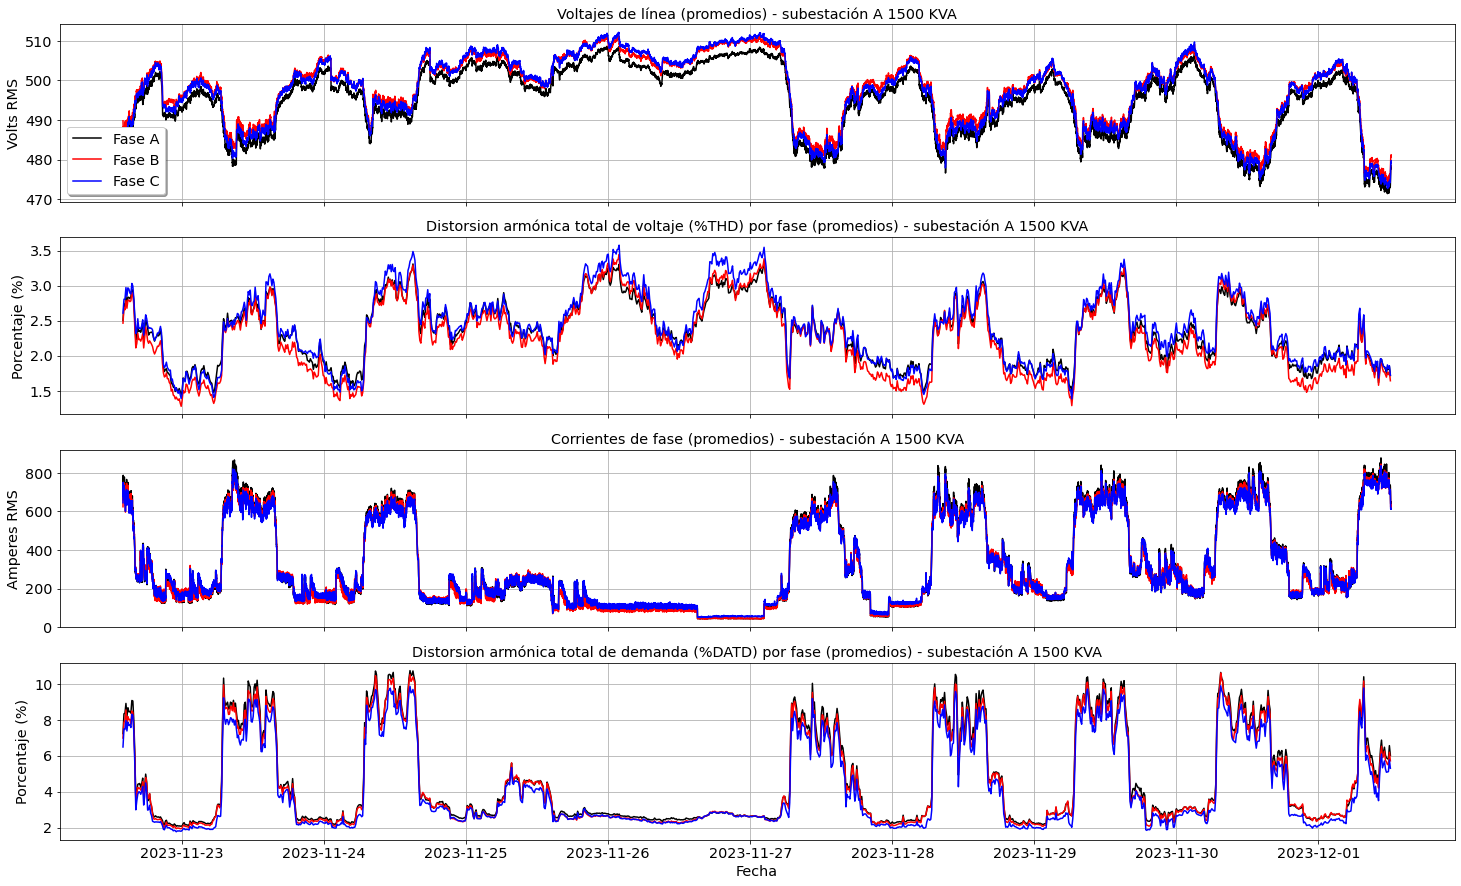

In [79]:
fig, (dx1, dx2, dx3, dx4) = plt.subplots( 
    figsize=(25,15),
    nrows=4, ncols=1, sharex=True
)

dx1.set_title('Voltajes de línea (promedios) - subestación A 1500 KVA')
dx1.set_ylabel('Volts RMS')
dx4.set_xlabel('Fecha')

dx1.plot(x1, vaavg, color ='black', label='Fase A')
dx1.plot(x1, vbavg, color = 'red', label='Fase B')
dx1.plot(x1, vcavg, color ='blue', label='Fase C')



dx2.set_title('Distorsion armónica total de voltaje (%THD) por fase (promedios) - subestación A 1500 KVA')
dx2.set_ylabel('Porcentaje (%)')
dx2.plot(x11, thdaavg, color ='black', label='Fase A')
dx2.plot(x11, thdbavg, color = 'red', label='Fase B')
dx2.plot(x11, thdcavg, color ='blue', label='Fase C')


dx3.set_title('Corrientes de fase (promedios) - subestación A 1500 KVA')
dx3.set_ylabel('Amperes RMS')
dx3.plot(x1, iaavg, color ='black', label='Ia-avg')
dx3.plot(x1, ibavg, color = 'red', label='Ib-avg')
dx3.plot(x1, icavg, color ='blue', label='Ic-avg')

dx4.set_title('Distorsion armónica total de demanda (%DATD) por fase (promedios) - subestación A 1500 KVA')
dx4.set_ylabel('Porcentaje (%)')
dx4.plot(x11, tddaavg, color ='black', label='Fase A')
dx4.plot(x11, tddbavg, color = 'red', label='Fase B')
dx4.plot(x11, tddcavg, color ='blue', label='Fase C')



dx1.grid()
dx2.grid()
dx3.grid()
dx4.grid()



dx1.legend(loc='lower left', shadow=True)
#dx3.legend(loc='lower right', shadow=True)
#dx4.legend(loc='upper center', shadow=True)


plt.show()

## Estadisticas

In [47]:
thd1=thdv.describe()
thd1

,AVTHDRssMax[Volts],AVTHDRssAvg[Volts],BVTHDRssMax[Volts],BVTHDRssAvg[Volts],CVTHDRssMax[Volts],CVTHDRssAvg[Volts],THDV-A-Max,THDV-A-Avg,THDV-B-Max,THDV-B-Avg,THDV-C-Max,THDV-C-Avg
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,7.146993,6.505315,6.945951,6.280594,7.356420,6.681838,2.580142,2.348489,2.507564,2.267362,2.655747,2.412216
std,1.317709,1.210205,1.521344,1.404179,1.489837,1.384135,0.475707,0.436897,0.549222,0.506924,0.537847,0.499688
min,4.467000,3.967000,3.995000,3.540000,4.199000,3.832000,1.612635,1.432130,1.442238,1.277978,1.515884,1.383394
25%,5.984000,5.405000,5.578500,5.016250,6.077500,5.533750,2.160289,1.951264,2.013899,1.810921,2.194043,1.997744
50%,7.155500,6.522500,6.978500,6.254000,7.376500,6.624500,2.583213,2.354693,2.519314,2.257762,2.662996,2.391516
75%,8.214500,7.450500,8.198500,7.353500,8.527500,7.660750,2.965523,2.689711,2.959747,2.654693,3.078520,2.765614
max,10.399000,9.235000,10.385000,9.534000,10.974000,9.906000,3.754152,3.333935,3.749097,3.441877,3.961733,3.576173


In [48]:
tdd1=tdd.describe()
tdd1

,AITHDRssMax[Amps],AITHDRssAvg[Amps],BITHDRssMax[Amps],BITHDRssAvg[Amps],CITHDRssMax[Amps],CITHDRssAvg[Amps],TDD-A-Max,TDD-A-Avg,TDD-B-Max,TDD-B-Avg,TDD-C-Max,TDD-C-Avg
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,36.468953,29.844909,33.315397,27.068785,35.188823,28.936269,5.610608,4.591524,5.125446,4.164429,5.413665,4.451734
std,23.927140,17.070005,22.001145,15.659146,22.861791,16.545356,3.681098,2.626155,3.384791,2.409099,3.517199,2.545439
min,13.908000,13.461000,11.972000,11.476000,13.165000,12.577000,2.139692,2.070923,1.841846,1.765538,2.025385,1.934923
25%,17.371750,16.729750,15.976750,15.249500,16.872000,16.051250,2.672577,2.573808,2.457962,2.346077,2.595692,2.469423
50%,21.940000,20.338000,19.676000,18.299000,21.605000,20.046500,3.375385,3.128923,3.027077,2.815231,3.323846,3.084077
75%,60.007500,45.715000,54.875000,41.885000,57.162500,44.372500,9.231923,7.033077,8.442308,6.443846,8.794231,6.826538
max,92.580000,69.800000,84.380000,64.300000,90.640000,68.930000,14.243077,10.738462,12.981538,9.892308,13.944615,10.604615


## Componentes armonicas predominantes (5a, 7ma, 11va, 13va, 19)

In [49]:
harm.head()

,Fecha,AI HG05Avg[Amps],BI HG05Avg[Amps],CI HG05Avg[Amps],AI HG07Avg[Amps],BI HG07Avg[Amps],CI HG07Avg[Amps],AI HG11Avg[Amps],BI HG11Avg[Amps],CI HG11Avg[Amps],AI HG13Avg[Amps],BI HG13Avg[Amps],CI HG13Avg[Amps],AI HG19Avg[Amps],BI HG19Avg[Amps],CI HG19Avg[Amps],Column1
0,2023-11-22 14:00:00,38.78,32.65,35.63,14.690,12.230,15.930,20.176,21.229,17.957,5.351,4.333,3.7770,0.6539,1.1128,1.0632,NaN
1,2023-11-22 14:10:00,43.80,36.81,39.35,20.266,17.084,21.170,22.416,24.049,19.890,7.401,5.688,4.6880,1.4520,1.7857,2.0555,NaN
2,2023-11-22 14:20:00,46.56,39.57,42.67,17.967,14.853,18.799,19.435,20.768,17.050,5.651,5.016,3.8640,1.4448,1.5470,1.8491,NaN
3,2023-11-22 14:30:00,51.21,43.16,46.74,19.183,17.198,20.729,17.534,19.254,16.205,3.716,4.266,2.9599,1.6959,1.4747,1.8755,NaN
4,2023-11-22 14:40:00,44.32,36.63,39.34,20.837,19.043,22.348,19.433,20.954,16.876,4.079,4.959,3.0151,1.5049,1.3496,1.7652,NaN


In [50]:
x1= va['Fecha']
H1= harm['Fecha']


#############################

h5a= harm['AI HG05Avg[Amps]']
h5b= harm['BI HG05Avg[Amps]']
h5c= harm['CI HG05Avg[Amps]']

##############################

h7a= harm['AI HG07Avg[Amps]']
h7b= harm['BI HG07Avg[Amps]']
h7c= harm['CI HG07Avg[Amps]']

##############################

h11a= harm['AI HG11Avg[Amps]']
h11b= harm['BI HG11Avg[Amps]']
h11c= harm['CI HG11Avg[Amps]']

##############################

h13a= harm['AI HG13Avg[Amps]']
h13b= harm['BI HG13Avg[Amps]']
h13c= harm['CI HG13Avg[Amps]']

##############################

h19a= harm['AI HG19Avg[Amps]']
h19b= harm['BI HG19Avg[Amps]']
h19c= harm['CI HG19Avg[Amps]']

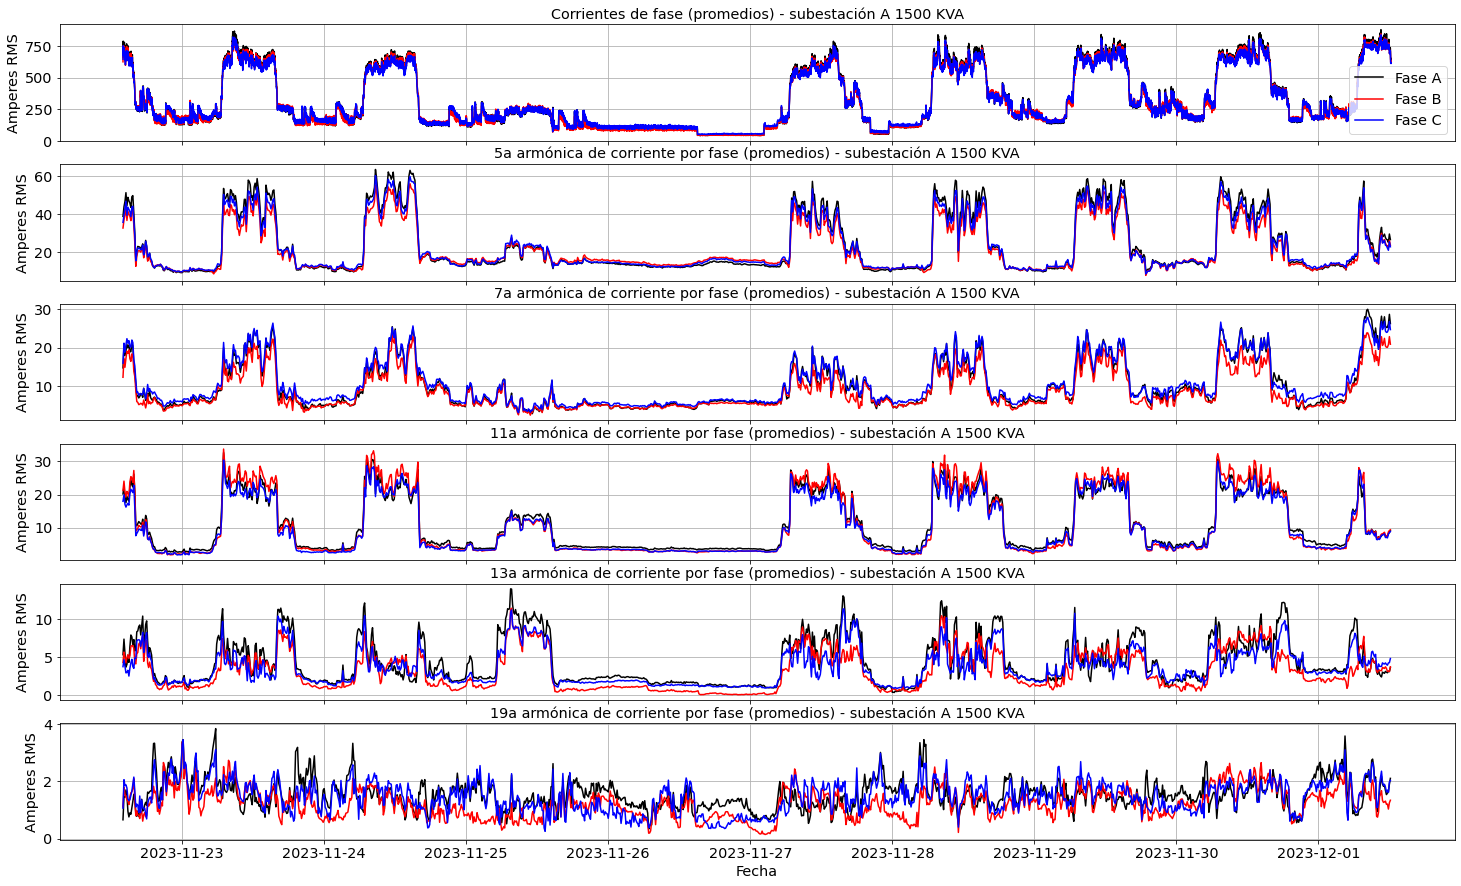

In [78]:
fig, (hx1, hx2, hx3, hx4, hx5, hx6) = plt.subplots( 
    figsize=(25,15),
    nrows=6, ncols=1, sharex=True
)

hx6.set_xlabel('Fecha')

hx1.set_title('Corrientes de fase (promedios) - subestación A 1500 KVA')
hx1.set_ylabel('Amperes RMS')
hx1.plot(x1, iaavg, color ='black', label='Fase A')
hx1.plot(x1, ibavg, color = 'red', label='Fase B')
hx1.plot(x1, icavg, color ='blue', label='Fase C')

hx2.set_title('5a armónica de corriente por fase (promedios) - subestación A 1500 KVA')
hx2.set_ylabel('Amperes RMS')
hx2.plot(H1, h5a, color ='black', label='Ia -avg')
hx2.plot(H1, h5b, color = 'red', label='Ib-avg')
hx2.plot(H1, h5c, color ='blue', label='Ic-avg')

hx3.set_title('7a armónica de corriente por fase (promedios) - subestación A 1500 KVA')
hx3.set_ylabel('Amperes RMS')
hx3.plot(H1, h7a, color ='black', label='Ia -avg')
hx3.plot(H1, h7b, color = 'red', label='Ib-avg')
hx3.plot(H1, h7c, color ='blue', label='Ic-avg')

hx4.set_title('11a armónica de corriente por fase (promedios) - subestación A 1500 KVA')
hx4.set_ylabel('Amperes RMS')
hx4.plot(H1, h11a, color ='black', label='Ia -avg')
hx4.plot(H1, h11b, color = 'red', label='Ib-avg')
hx4.plot(H1, h11c, color ='blue', label='Ic-avg')

hx5.set_title('13a armónica de corriente por fase (promedios) - subestación A 1500 KVA')
hx5.set_ylabel('Amperes RMS')
hx5.plot(H1, h13a, color ='black', label='Ia -avg')
hx5.plot(H1, h13b, color = 'red', label='Ib-avg')
hx5.plot(H1, h13c, color ='blue', label='Ic-avg')

hx6.set_title('19a armónica de corriente por fase (promedios) - subestación A 1500 KVA')
hx6.set_ylabel('Amperes RMS')
hx6.plot(H1, h19a, color ='black', label='Ia -avg')
hx6.plot(H1, h19b, color = 'red', label='Ib-avg')
hx6.plot(H1, h19c, color ='blue', label='Ic-avg')




hx1.grid()
hx2.grid()
hx3.grid()
hx4.grid()
hx5.grid()
hx6.grid()



hx1.legend()
#hx2.legend()
#hx3.legend()
#hx4.legend()
#hx5.legend()

#dx2.legend(loc='lower right', shadow=True)



plt.show()

## Estadisticas

In [52]:
harm.describe()

,AI HG05Avg[Amps],BI HG05Avg[Amps],CI HG05Avg[Amps],AI HG07Avg[Amps],BI HG07Avg[Amps],CI HG07Avg[Amps],AI HG11Avg[Amps],BI HG11Avg[Amps],CI HG11Avg[Amps],AI HG13Avg[Amps],BI HG13Avg[Amps],CI HG13Avg[Amps],AI HG19Avg[Amps],BI HG19Avg[Amps],CI HG19Avg[Amps],Column1
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,0.0
mean,23.359661,21.648536,22.812195,9.827623,8.637431,10.564302,10.821275,10.760953,9.914525,4.380085,3.200964,3.665151,1.530444,1.224582,1.461995,NaN
std,15.153003,12.049359,13.480658,6.073263,4.974040,5.902000,8.124690,9.421196,8.096041,2.973507,2.511839,2.294957,0.511017,0.507245,0.536349,NaN
min,9.210000,7.791000,8.551000,2.683900,2.295200,2.933400,2.554200,1.781300,1.753000,0.379100,0.081310,0.917900,0.329300,0.140050,0.251050,NaN
25%,12.392000,13.021250,12.941250,5.290500,4.973000,6.066250,3.991500,3.184500,3.221250,1.985875,1.071050,1.802025,1.181400,0.833250,1.061200,NaN
50%,14.846000,15.811500,15.609000,6.974500,6.124500,7.978500,6.192000,4.927000,5.330000,3.321000,2.360100,2.981500,1.471000,1.195850,1.453850,NaN
75%,35.495000,29.687500,32.735000,13.289000,11.754750,14.548000,19.516250,21.358000,18.927500,6.587750,5.204750,5.128750,1.819600,1.563025,1.848600,NaN
max,63.390000,55.940000,60.110000,30.061000,23.877000,27.945000,32.670000,33.750000,30.436000,14.024000,11.463000,11.390000,3.841000,3.362000,3.451000,NaN
